In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html 
%matplotlib inline
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = train.append(test)

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [3]:
train=train.fillna(train.median())
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test=test.fillna(train.median())
test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [5]:
train=train.drop(columns=['Cabin'])
test=test.drop(columns=['Cabin'])

# Data visualization

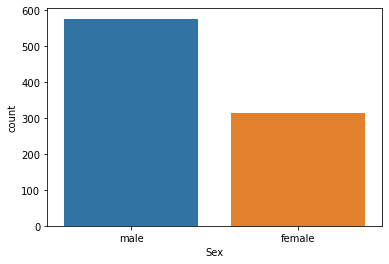

In [6]:
train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived')
sns.countplot(x='Sex',data=train)

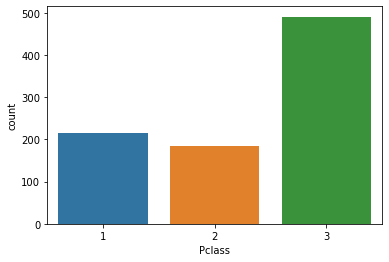

In [7]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')
sns.countplot(x='Pclass',data=train)

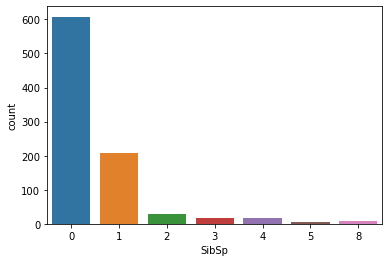

In [8]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived')
sns.countplot(x='SibSp',data=train)

# Data Preprocessing


## Sex

In [9]:
train['Sex_Code'] = train['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
test['Sex_Code'] = test['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
#train=train.drop(columns='Sex')
#test=test.drop(columns='Sex')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


## Fare

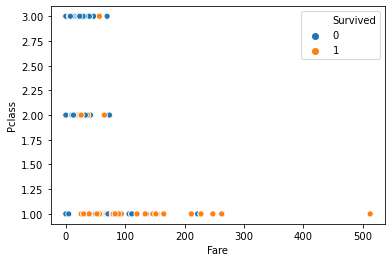

In [10]:
sns.scatterplot(x='Fare',y='Pclass',hue='Survived',data=train)

In [11]:
train['Farecut'] = pd.qcut(train['Fare'], 6)
Farecut6 = train[['Farecut', 'Survived']].groupby(['Farecut'], as_index=False).mean().sort_values(by='Farecut', ascending=True).style.set_table_attributes("style='display:inline'")
display(Farecut6)

,Farecut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [12]:
bins = [-np.inf,  7.775,  8.662,  14.454,  26, 52.369,  np.inf]
labels=[0,1,2,3,4,5]
train['Farecut'] = pd.cut(train['Fare'], bins=bins, labels=labels)
test['Farecut'] = pd.cut(test['Fare'], bins=bins, labels=labels)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Farecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,1,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,4


## Embarked

In [13]:
print(train.Embarked.isna().sum())
print(test.Embarked.isna().sum())

2
0


In [14]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [15]:
train.Embarked=train.Embarked.fillna('C')
print(train.Embarked.isna().sum())

0


In [16]:
train['Embarked'] = train['Embarked'].map({'C' : 0, 'Q' : 1,'S':2}).astype('int')
test['Embarked'] = test['Embarked'].map({'C' : 0, 'Q' : 1,'S':2}).astype('int')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Farecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,1,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,1,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,2,1,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0,0,4


# Name

In [17]:
train['Title']=train['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
test['Title']=test['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Farecut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,1,5,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,Miss


In [18]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [19]:
pd.crosstab(train['Title'],train['Sex']).T.style.background_gradient(cmap='GnBu')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [20]:
pd.crosstab(train['Title'],train['Survived']).T.style.background_gradient(cmap='OrRd')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [21]:
def namefilter(s):
    n=s.split(',')[-1].split('.')[0]
    n=n.replace(' ','')
    
    if n =='Miss' : 
        return 'Ms'
    if n =='Mlle':
        return 'Ms'
    if n =='Mme':
        return 'Ms'
    if n =='Lady':
        return 'Ms'
    if n=='Mr':
        return 'Mr'
    if n=='Mrs' :
        return 'Mrs'
    else:
        return 'others'
    
name = train['Name'].apply(namefilter)
dummy=pd.get_dummies(name)
train=pd.concat([train,dummy],axis=1)
pd.crosstab(name,train['Survived']).T

name2=test['Name'].apply(namefilter)
dummy2=pd.get_dummies(name2)
test=pd.concat([test,dummy2],axis=1)

In [22]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Sex_Code', 'Farecut', 'Title',
       'Mr', 'Mrs', 'Ms', 'others'],
      dtype='object')

In [23]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Farecut,Title,Mr,Mrs,Ms,others
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,0,Mr,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,1,5,Mrs,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,Miss,0,0,1,0


## Family Size

In [24]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

# ML

In [25]:
train=train[['Survived','Sex_Code','Farecut','Embarked','Age','Ms','Mr','Mrs','others','Family_size']]
test=test[['PassengerId','Sex_Code','Farecut','Embarked','Age','Ms','Mr','Mrs','others','Family_size']]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
train_x=train.drop(columns=['Survived'])
train_y=train['Survived']

clf = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True) 

np.average(cross_val_score(clf,train_x,train_y,cv=10))

0.8316604244694134

In [28]:
test_x=test.drop(columns=['PassengerId'])
test_ID=test['PassengerId']

from sklearn .model_selection import GridSearchCV
p={
    'max_depth':range(9,11),
    'n_estimators':range(20,30)
}
clf=RandomForestClassifier()
s=GridSearchCV(clf,p,cv=10)
s.fit(train_x,train_y)



pre=s.predict(test_x)
result=pd.DataFrame()
result['PassengerId']=test_ID
result['Survived']=pre
result.to_csv(r'result.csv',encoding='utf-8',index=False)